<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 

In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()
#(50000, 3072), (50000), (10000,32,32,3)


169001437/169001437 [==============================] - 4s 0us/step


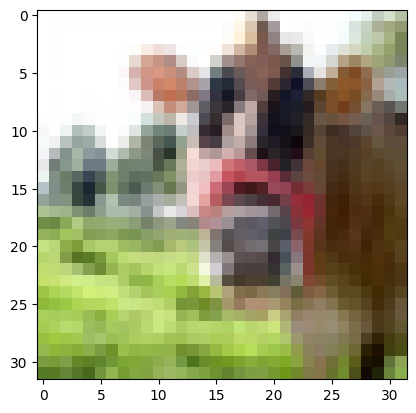

Cai nay la: [19]


In [3]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[0])

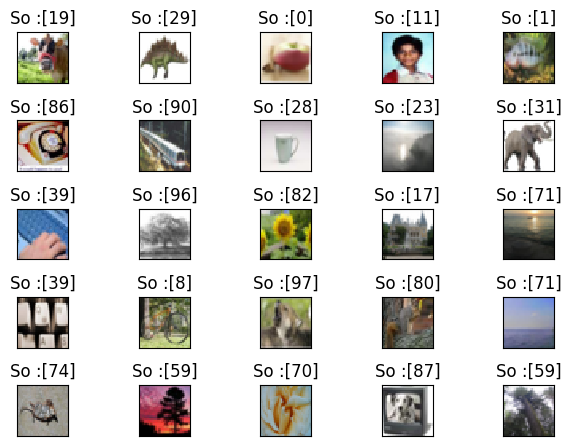

In [4]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Sequential()

model.add(Dense(1024, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 100)               102500    
                                                                 
Total params: 4,298,852
Trainable params: 4,298,852
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255    


In [7]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [8]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [9]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 1024)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
49/49 [==============================] - 28s 511ms/step - loss: 4.5898 - accuracy: 0.0324
Epoch 2/20
49/49 [==============================] - 19s 384ms/step - loss: 4.1474 - accuracy: 0.0672
Epoch 3/20
49/49 [==============================] - 18s 361ms/step - loss: 3.9978 - accuracy: 0.0893
Epoch 4/20
49/49 [==============================] - 18s 362ms/step - loss: 3.8801 - accuracy: 0.1058
Epoch 5/20
49/49 [==============================] - 20s 404ms/step - loss: 3.7816 - accuracy: 0.1236
Epoch 6/20
49/49 [==============================] - 18s 374ms/step - loss: 3.7143 - accuracy: 0.1364
Epoch 7/20
49/49 [==============================] - 19s 398ms/step - loss: 3.6469 - accuracy: 0.1475
Epoch 8/20
49/49 [==============================] - 18s 362ms/step - loss: 3.5763 - accuracy: 0.1573
Epoch 9/20
49/49 [==============================] - 19s 389ms/step - loss: 3.5197 - accuracy: 0.1707
Epoch 10/20
49/49 [==============================] - 18s 364ms/step - loss: 3.4629 - accura

In [10]:
model.save('cifar100.h5')

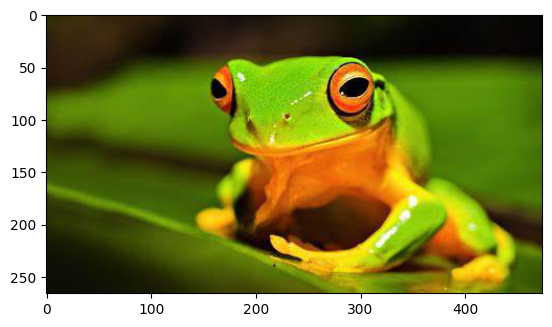

In [11]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('frog.jpg')
imshow(img)

In [13]:
img = load_img('frog.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 149ms/step


array([62])